In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = 'data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')


Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [11]:
def f1score(y, y_pred):
  return f1_score(y, tf.math.argmax(y_pred, axis=1), average='micro') 

def custom_f1score(y, y_pred):
  return tf.py_function(f1score, (y, y_pred), tf.double)

In [12]:
K.clear_session()
model = Sequential()
model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=[custom_f1score])

/home/ancao/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        23248     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        131104    
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        131136    
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                        

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score 
import os
class stop_training_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_custom_f1score') > 1.00):
      self.model.stop_training = True

/tmp/ipykernel_92/2341344976.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/100
864/864 [==============================] - 65s 74ms/step - loss: 3.2246 - custom_f1score: 0.1134 - val_loss: 2.0152 - val_custom_f1score: 0.4256
Epoch 2/100
864/864 [==============================] - 62s 72ms/step - loss: 1.3283 - custom_f1score: 0.5891 - val_loss: 0.7210 - val_custom_f1score: 0.8036
Epoch 3/100
864/864 [==============================] - 58s 67ms/step - loss: 0.6730 - custom_f1score: 0.7836 - val_loss: 0.2849 - val_custom_f1score: 0.9256
Epoch 4/100
864/864 [==============================] - 55s 64ms/step - loss: 0.4408 - custom_f1score: 0.8576 - val_loss: 0.3626 - val_custom_f1score: 0.9033
Epoch 5/100
864/864 [==============================] - 69s 80ms/step - loss: 0.3211 - custom_f1score: 0.9016 - val_loss: 0.3729 - val_custom_f1score: 0.8824
Epoch 6/100
864/864 [==============================] - 63s 72ms/step - loss: 0.2645 - custom_f1score: 0.9248 - val_loss: 0.2045 - val_custom_f1score: 0.9375
Epoch 7/100
864/864 [==============================] - 59s

Epoch 53/100
864/864 [==============================] - 49s 57ms/step - loss: 0.0590 - custom_f1score: 0.9769 - val_loss: 0.0383 - val_custom_f1score: 0.9866
Epoch 54/100
864/864 [==============================] - 51s 59ms/step - loss: 0.0269 - custom_f1score: 0.9907 - val_loss: 0.0130 - val_custom_f1score: 0.9955
Epoch 55/100
864/864 [==============================] - 49s 57ms/step - loss: 0.0406 - custom_f1score: 0.9838 - val_loss: 0.0316 - val_custom_f1score: 0.9851
Epoch 56/100
864/864 [==============================] - 52s 60ms/step - loss: 0.0694 - custom_f1score: 0.9826 - val_loss: 0.0407 - val_custom_f1score: 0.9851
Epoch 57/100
864/864 [==============================] - 53s 61ms/step - loss: 0.0409 - custom_f1score: 0.9873 - val_loss: 0.0129 - val_custom_f1score: 0.9940
Epoch 58/100
864/864 [==============================] - 47s 54ms/step - loss: 0.0800 - custom_f1score: 0.9734 - val_loss: 0.0389 - val_custom_f1score: 0.9717
Epoch 59/100
864/864 [==============================

/tmp/ipykernel_92/2341344976.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator).argmax(axis=1)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.17      0.17      0.17         6
           5       0.17      0.17      0.17         6
           6       0.00      0.00      0.00         6
           7       0.17      0.17      0.17         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         6
          15       0.17      0.17      0.17         6
          16       0.00      0.00      0.00         6
    

2023-06-26 15:14:57.322990: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: ValueError: Could not find callback with key=pyfunc_2 in the registry.
Traceback (most recent call last):

  File "/home/ancao/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 259, in __call__
    raise ValueError(f"Could not find callback with key={token} in the "

ValueError: Could not find callback with key=pyfunc_2 in the registry.


2023-06-26 15:14:57.324357: W tensorflow/core/kernels/data/generator_dataset_op.cc:107] Error occurred when finalizing GeneratorDataset iterator: INVALID_ARGUMENT: ValueError: Could not find callback with key=pyfunc_2 in the registry.
Traceback (most recent call last):

  File "/home/ancao/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 259, in __call__
    raise ValueError(f"Could not find callback with key={token} in the "

ValueError: Could not find callback with key=pyfunc_2 in the registry.



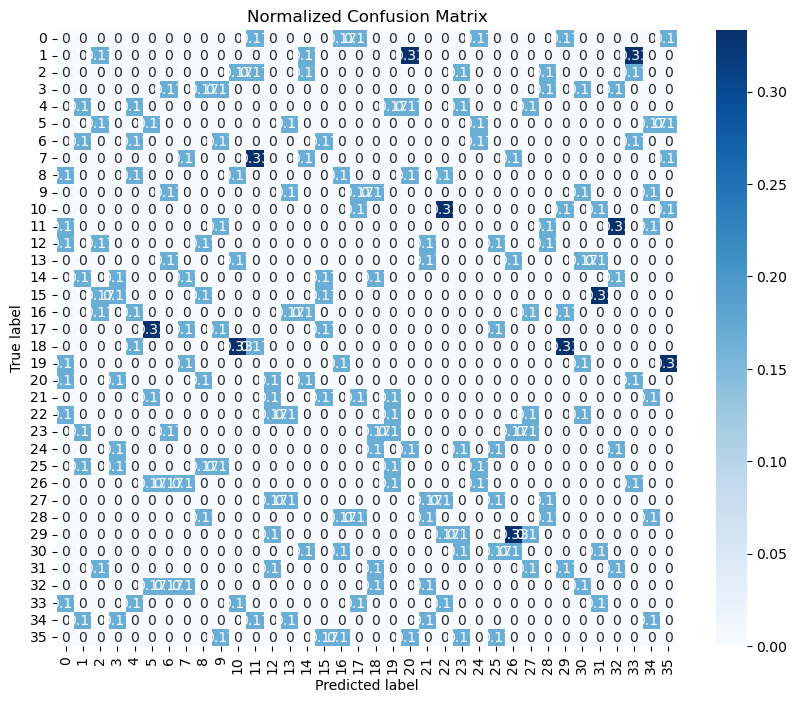

In [15]:
batch_size = 1
log_dir = './logs'
os.makedirs(log_dir, exist_ok=True)
csv_logger = tf.keras.callbacks.CSVLogger(os.path.join(log_dir, 'logg.csv'), separator=',', append=False)
callbacks = [stop_training_callback(), csv_logger]

model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      epochs = 100, verbose=1, callbacks=callbacks)

# Dự đoán nhãn của tập validation
y_pred = model.predict_generator(validation_generator).argmax(axis=1)
y_true = validation_generator.classes

# In ra Classification Report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

# In ra Normalized Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
plt.show()